<a href="https://colab.research.google.com/github/mayaraperroni9/datascience/blob/main/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

In [ ]:
# Basics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visuals
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Regression and Regularization
from sklearn.linear_model import LinearRegression, Ridge, LassoCV

# Normalização
from sklearn.preprocessing import StandardScaler

# Métricas
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter('ignore')

In [ ]:
X = pd.read_csv('/content/houses_to_rent_v2 (2).csv', na_values='?')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
valores_ausentes = X.isnull().sum(axis=0)
print('Quantidade de valores faltantes para cada variável do dataset:')
print(valores_ausentes)


Quantidade de valores faltantes para cada variável do dataset:
city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64


In [ ]:
tipo = X.dtypes
print('\nVariáveis numéricas:')
variaveis_numericas = tipo[tipo != 'object'].index.tolist()
print(variaveis_numericas)

print('\nVariáveis categóricas:')
variaveis_categoricas = tipo[tipo == 'object'].index.tolist()
print(variaveis_categoricas)



Variáveis numéricas:
['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']

Variáveis categóricas:
['city', 'floor', 'animal', 'furniture']


In [ ]:
X.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
# Removendo valores nulos
for variavel in variaveis_numericas:
    media = X[variavel].mean()
    X[variavel].fillna(media, inplace=True)

#X.fillna(mean, inplace=True)

In [ ]:
cols = X.select_dtypes(np.number).columns
#cols = cols.delete(-1)
X[cols] = StandardScaler().fit_transform(X[cols])

In [ ]:
# Função get_dummies do pandas
df2 = pd.get_dummies(X,drop_first=True)
df2

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Campinas,...,floor_4,floor_46,floor_5,floor_51,floor_6,floor_7,floor_8,floor_9,animal_not acept,furniture_not furnished
0,-0.147522,-0.432099,-0.878960,-0.383245,0.057145,-0.174935,-0.050103,-0.236589,0.007736,False,...,False,False,False,False,False,True,False,False,False,False
1,0.318035,1.275535,1.253036,-1.012395,0.001666,0.312099,0.445121,0.203056,0.150602,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.128899,-1.285916,-0.878960,-0.383245,-0.011161,-0.321632,-0.117999,-0.257525,-0.100066,False,...,False,False,False,False,True,False,False,False,False,True
3,-0.182904,-0.432099,-0.878960,-1.012395,-0.057981,-0.816881,-0.110920,-0.759976,-0.246876,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.231322,-1.285916,-0.878960,-1.012395,-0.075298,-0.908420,-0.109955,-0.885589,-0.282365,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,-0.160557,-0.432099,-0.878960,-0.383245,-0.049515,-0.709499,-0.110276,-0.655299,-0.216240,False,...,False,False,True,False,False,False,False,False,True,False
10688,0.252857,1.275535,1.253036,1.504205,0.123527,3.257774,0.195095,2.882798,0.835328,False,...,False,False,False,False,False,False,False,False,False,True
10689,-0.147522,0.421718,0.542371,-1.012395,-0.012444,0.617228,-0.011167,0.517088,0.115234,False,...,False,False,False,False,False,False,True,False,True,False
10690,-0.054410,-0.432099,-0.168294,0.245905,0.026359,2.377592,-0.028222,2.129120,0.517443,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Split X e Y

X = df2.drop(['total (R$)'], axis=1)
#y = np.log10(df2.total (R$))
y = df2['total (R$)']

In [ ]:
print(y)

0      4.566365
1      4.004484
2      4.004484
3      3.985755
4      3.554979
         ...   
540   -1.576868
541   -1.605149
542   -1.614327
543   -1.614327
544   -1.614327
Name: price, Length: 545, dtype: float64


In [ ]:
# Split Treino e teste
Xt, Xteste, yt, yteste = train_test_split(X, y, test_size=0.1, random_state=12)

In [ ]:
def rmse_cv(modelo):
  rmse = np.sqrt(-cross_val_score(modelo,
                                  X,
                                  y,
                                  scoring = 'neg_mean_squared_error',
                                  cv=5))
  return rmse

In [ ]:
# Instancia e fit
modelo_lr = LinearRegression()

# Fit
modelo_lr.fit(Xt,yt)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)



LinearRegression()

In [ ]:
# Erro
rmse1 = rmse_cv(modelo_lr)
print(f'O erro do modelo foi de {rmse1.mean()}')

O erro do modelo foi de 0.0003130123171109395


In [ ]:
# Loop para testar valores de alpha
alphas = [0.1, 0.5, 1, 3, 5, 10]
erro = []
for a in alphas:
  # Instancia
  lm_ridge = Ridge(alpha=a)
  # Fit
  lm_ridge.fit(Xt,yt)
  # Erro
  rmse2 = rmse_cv(lm_ridge)
  erro.append(rmse2.mean())

In [ ]:
# Erro

print(f'O erro do modelo foi de {round(np.mean(erro),4)}')

O erro do modelo foi de 0.0015


In [ ]:
alphas = [0.1, 0.5, 1, 3, 5, 10, 70]

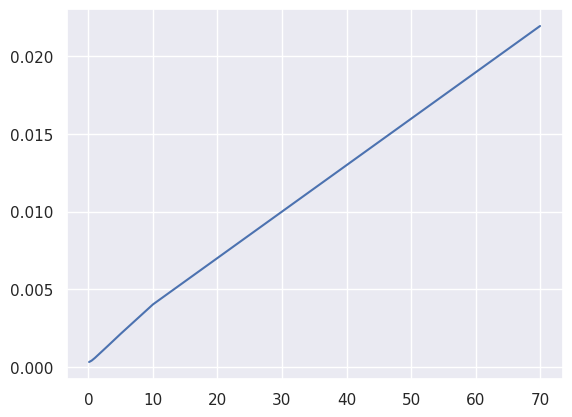

In [ ]:
# Plot do efeito de lambda no modelo
cv_ridge = [rmse_cv(Ridge(alpha=a)).mean() for a in alphas]
cv_ridge = pd.Series(cv_ridge, index=alphas)
cv_ridge.plot();

In [ ]:
# Veja que o método Ridge não chega a zerar quase nenhum coeficiente, mantendo todos eles no modelo.
len(lm_ridge.coef_[lm_ridge.coef_ == 0])

0

**Regularização LASSO ou L1** <br>
Na Regularização LASSO, temos o parâmetro alpha como método de penalização que zera os coeficientes. Vamos ver o efeito dele sobre o resultado.

In [ ]:
# Instancia e fit
lm_lasso = LassoCV(alphas=[0.000005, 0.001 , 0.1, 0.5, 1]).fit(Xt,yt)

In [ ]:
# Erro
rmse3 = np.sqrt(-cross_val_score(lm_lasso, X, y, scoring = 'neg_mean_squared_error', cv=5))

print(f'O erro do modelo foi de {rmse3.mean()}')

O erro do modelo foi de 0.0006953523846247013


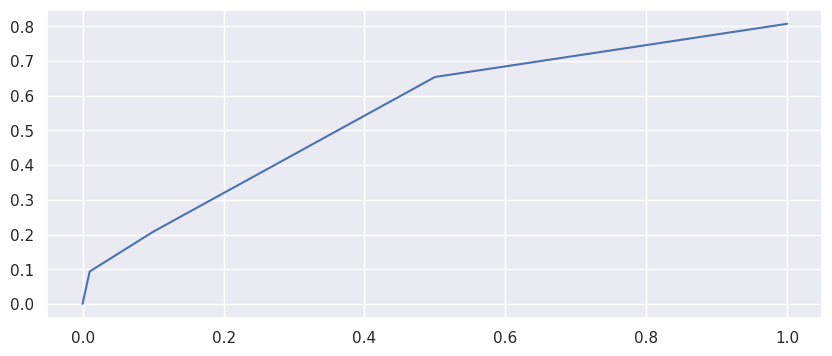

In [ ]:
alphas = [0.000005, 0.001 , 0.01, 0.1, 0.5, 1]
erro_lasso = [rmse_cv( LassoCV(alphas=[a]) ).mean() for a in alphas]
plt.figure(figsize=(10,4))
plt.plot(alphas,erro_lasso);

In [ ]:
len(lm_lasso.coef_[lm_lasso.coef_ == 0.00])

17

**Validação**

In [ ]:
# Regressão Linear
predlm = modelo_lr.predict(Xteste)

In [ ]:
# Ridge
predridge = lm_ridge.predict(Xteste)


In [ ]:
# Lasso
predlasso = lm_lasso.predict(Xteste)

In [ ]:
# Performance Dataset
performance = pd.DataFrame({'Valor Y':yteste, 'Regressao': predlm, 'DifReg': yteste,'Ridge': predridge, 'DifRidge': yteste, 'Lasso': predlasso, 'DifLasso': yteste})


In [ ]:
pd.DataFrame([{'Erro Regressão': round(performance.DifReg.mean()), 'Erro Ridge':round(10**performance.DifRidge.mean(),3), 'Erro Lasso': round(10** performance.DifLasso.mean(),3)}])


,Erro Regressão,Erro Ridge,Erro Lasso
0,0,0.975,0.975


In [ ]:
from google.colab import drive
drive.mount('/content/drive')